In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint

In [2]:
qb_file= "Resources/raw.csv"
qb_stats_file = "Resources/static_data.csv"
qb_df=pd.read_csv(qb_stats_file)
qb_stats_df=pd.read_csv(qb_file)

In [3]:
qb_stats_df

,Player,player_year,season_year,Tm,Age,G,GS,Wins,Losses,Yds,TD,Y/A,Y/G,Rate,Salary
0,A.J. Feeley,1,2001,PHI,24.0,1.0,0.0,0.0,0.0,143.0,2.0,10.2,143.0,114.0,319325.0
1,A.J. Feeley,2,2002,PHI,25.0,6.0,5.0,4.0,1.0,1011.0,6.0,6.6,168.5,75.4,389000.0
2,A.J. Feeley,3,2004,MIA,27.0,11.0,8.0,3.0,5.0,1893.0,11.0,5.3,172.1,61.7,3455000.0
3,A.J. Feeley,4,2006,PHI,29.0,2.0,0.0,0.0,0.0,342.0,3.0,9.0,171.0,122.9,1540000.0
4,A.J. Feeley,5,2007,PHI,30.0,3.0,2.0,0.0,2.0,681.0,5.0,6.6,227.0,61.2,190588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,Vince Young,4,2009,TEN,27.0,9.0,8.0,4.0,4.0,1255.0,10.0,8.0,139.4,98.6,4000000.0
673,Vince Young,5,2010,TEN,28.0,6.0,3.0,1.0,2.0,866.0,4.0,7.6,144.3,60.8,350000.0
674,Vince Young,6,2011,PHI,23.0,7.0,6.0,0.0,6.0,1412.0,8.0,7.9,201.7,83.4,451279.0
675,Zach Mettenberger,1,2014,TEN,24.0,7.0,4.0,0.0,4.0,935.0,4.0,5.6,133.6,66.7,541279.0


In [4]:
qb_df

,Player,Rnd,Pick,DrAge,Tm,College/Univ
0,A.J. Feeley,5,155,24,PHI,Oregon
1,A.J. McCarron,5,164,23,CIN,Alabama
2,Aaron Rodgers,1,24,21,GNB,California
3,Alex Smith,1,1,21,SFO,Utah
4,Andrew Luck,1,1,22,IND,Stanford
...,...,...,...,...,...,...
83,Troy Smith,5,174,23,BAL,Ohio St.
84,Tyler Thigpen,7,217,23,MIN,Coastal Carolina
85,Tyrod Taylor,6,180,22,BAL,Virginia Tech
86,Vince Young,1,3,23,TEN,Texas


<BarContainer object of 7 artists>

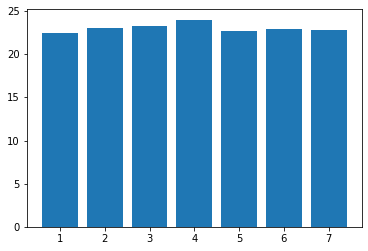

In [5]:
qb_round=qb_df.groupby(qb_df['Rnd']).mean()
qb_round.sort_values('DrAge',ascending=False)
Round=qb_round.index
Age=qb_round['DrAge']
plt.bar(Round,Age)

In [6]:
qb_round

,Pick,DrAge
Rnd,,
1,10.882353,22.500000
2,44.400000,23.000000
3,80.083333,23.250000
4,110.375000,24.000000
5,156.500000,22.750000
6,190.636364,22.909091
7,231.200000,22.800000


Text(0.5, 1.0, 'Career Length')

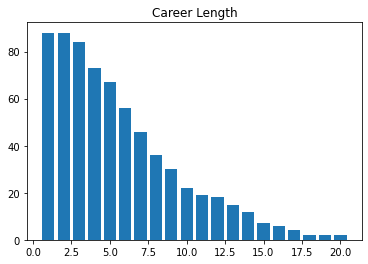

In [7]:
qb_best=qb_stats_df.groupby(qb_stats_df['player_year']).count()
x_values=qb_best.index
y_values=qb_best['Player']
plt.bar(x_values,y_values)
plt.title("Career Length")